In [24]:
from simulations.elastic_collisions import Body, HiddenVariables, Variables, ElasticCollisionSimulation
import torch
from torch import Tensor
from torch.distributions import Distribution
from typing import Union, Callable

### The n-body collision problem

##### Visualise n body collision scenes for different bodies

#### Scenario 1 - Assumptions: 
- No force field (i.e. no air drag, attraction forces between bodies etc.)
- bodies are points of mass (a 'radius' value sets a range in which two close points are assumed to have collided)
- collisions are elastic (no loss of energy)
- the 'radius' values are the same and constant for each body
- the masses are the same and constant for each body 
- collisions with borders are also elastic
- the initial positions are fixed 

**Hidden variables:** initial velocity vectors

In [25]:

total_time = 10.0 
dt = 0.1
space_size = 10.0
max_radius = space_size // 10.0
acceleration_coefficient_value = 0.0
constant_mass_value = 1.0
constant_radius_value = max_radius
velocity_distribution = torch.distributions.Uniform(low=-4, high=4)
position_distribution = torch.distributions.Uniform(low=0.0, high=space_size)

num_bodies = 4
VARIABLES = Variables(
    masses = torch.full((num_bodies,), constant_mass_value),
    radii = torch.full((num_bodies,), constant_radius_value),
    starting_positions = None,
    initial_velocities= None,
    acceleration_coefficients = torch.full((num_bodies,), acceleration_coefficient_value),
    num_bodies = num_bodies,
    space_size = torch.tensor([space_size, space_size]),
)

initial_positions = ElasticCollisionSimulation.sample_initial_positions_without_overlap(VARIABLES, position_distribution)
VARIABLES.starting_positions = initial_positions
print(f"initial_positions: {initial_positions}")

initial_velocities = velocity_distribution.sample(sample_shape=torch.Size([num_bodies, 2]))
print(f"initial_velocities: {initial_velocities}")


simulation = ElasticCollisionSimulation( variables=VARIABLES, 
                                         enable_logging=False, 
                                         noise=False)

HIDDENVARIABLES = HiddenVariables(num_bodies=None, 
                                  masses=None,
                                  radii=None,
                                  acceleration_coefficients=None, 
                                  initial_velocities=initial_velocities,)

result = simulation.simulate(hidden_variables=HIDDENVARIABLES, \
                             total_time=total_time, \
                             dt=dt)

position_history = simulation.get_position_history()
velocity_history = simulation.get_velocity_history()

print(f"position_history: {position_history}")

# assume that position history is of length num_bodies 
assert len(position_history) == num_bodies
assert len(velocity_history) == num_bodies

# print position histories for body 1 
print(f"position_history for body 1: {position_history[0]}")
print(f"time history for body 1: {len(position_history[0])}")

# Transform the history so that each element represents a timestep
position_history_by_timestep = list(map(list, zip(*position_history)))
velocity_history_by_timestep = list(map(list, zip(*velocity_history)))

num_timesteps = len(position_history_by_timestep)

print(f"position_history_by_timestep: {position_history_by_timestep}")

# Assume that position history is of length num_timesteps
assert len(position_history_by_timestep) == num_timesteps
assert len(velocity_history_by_timestep) == num_timesteps

# Print position histories for timestep 1
print(f"position_history for timestep 1: {position_history_by_timestep[0]}")
print(f"velocity_history for timestep 1: {velocity_history_by_timestep[0]}")

print(f"position of body 1 at timestep 1: {position_history_by_timestep[0][0]}")
print(f"velocity of body 1 at timestep 1: {velocity_history_by_timestep[0][0]}")



initial_positions: tensor([[8.3996, 1.8380],
        [3.0078, 3.9169],
        [6.5646, 4.5584],
        [7.9448, 7.8941]])
initial_velocities: tensor([[ 0.7729,  1.6863],
        [-2.9332,  2.3915],
        [-0.5858,  2.6653],
        [ 1.4682, -1.1803]])
position_history: [[tensor([8.4769, 2.0067]), tensor([8.5542, 2.1753]), tensor([8.6315, 2.3439]), tensor([8.7088, 2.5126]), tensor([8.7860, 2.6812]), tensor([8.8633, 2.8498]), tensor([8.9406, 3.0185]), tensor([9.0179, 3.1871]), tensor([8.9406, 3.3557]), tensor([8.8633, 3.5244]), tensor([8.7860, 3.6930]), tensor([8.7088, 3.8617]), tensor([8.6315, 4.0303]), tensor([8.5542, 4.1989]), tensor([8.4769, 4.3676]), tensor([8.4586, 4.2674]), tensor([8.4381, 4.1771]), tensor([8.4176, 4.0867]), tensor([8.3971, 3.9964]), tensor([8.3766, 3.9061]), tensor([8.3562, 3.8158]), tensor([8.3357, 3.7255]), tensor([8.3152, 3.6352]), tensor([8.2947, 3.5449]), tensor([8.2742, 3.4546]), tensor([8.2538, 3.3642]), tensor([8.2333, 3.2739]), tensor([8.2128, 3.183

position_history_by_timestep: [[tensor([8.4769, 2.0067]), tensor([2.7144, 4.1561]), tensor([6.5060, 4.8249]), tensor([8.0916, 7.7761])], [tensor([8.5542, 2.1753]), tensor([2.4211, 4.3952]), tensor([6.4474, 5.0914]), tensor([8.2384, 7.6581])], [tensor([8.6315, 2.3439]), tensor([2.1278, 4.6344]), tensor([6.3888, 5.3579]), tensor([8.3853, 7.5401])], [tensor([8.7088, 2.5126]), tensor([1.8345, 4.8735]), tensor([6.3303, 5.6245]), tensor([8.5321, 7.4220])], [tensor([8.7860, 2.6812]), tensor([1.5412, 5.1126]), tensor([6.2717, 5.8910]), tensor([8.6789, 7.3040])], [tensor([8.8633, 2.8498]), tensor([1.2478, 5.3518]), tensor([6.2131, 6.1575]), tensor([8.8257, 7.1860])], [tensor([8.9406, 3.0185]), tensor([0.9545, 5.5909]), tensor([6.1545, 6.4241]), tensor([8.9725, 7.0679])], [tensor([9.0179, 3.1871]), tensor([1.2478, 5.8301]), tensor([6.0960, 6.6906]), tensor([9.1194, 6.9499])], [tensor([8.9406, 3.3557]), tensor([1.5412, 6.0692]), tensor([6.0374, 6.9571]), tensor([8.9725, 6.8319])], [tensor([8.8633

In [26]:
# added collision history 

collision_history_by_timestep = simulation.get_collision_history_per_timestep()

In [27]:
# loop though collision history by timestep and print out the collision history
for timestep, collisions in collision_history_by_timestep.items():
    print(f"timestep {timestep}:")
    for collision in collisions:

        # if there is key "boundary" then use that instead of body2 
        if "boundary" in collision:
            print(f"collision at time {collision['time']}: body {collision['body1']} and boundary {collision['boundary']}")
        else:
            print(f"collision at time {collision['time']}: body {collision['body1']} and body {collision['body2']}")

timestep 0:
timestep 1:
timestep 2:
timestep 3:
timestep 4:
timestep 5:
timestep 6:
timestep 7:
collision at time 0.7000000000000001: body 1 and boundary 0
timestep 8:
collision at time 0.8: body 0 and boundary 0
collision at time 0.8: body 3 and boundary 0
timestep 9:
timestep 10:
timestep 11:
timestep 12:
timestep 13:
timestep 14:
timestep 15:
collision at time 1.5: body 0 and body 3
timestep 16:
timestep 17:
collision at time 1.7000000000000002: body 2 and boundary 1
timestep 18:
collision at time 1.8: body 1 and body 2
timestep 19:
timestep 20:
timestep 21:
collision at time 2.1: body 2 and body 3
timestep 22:
timestep 23:
collision at time 2.3000000000000003: body 2 and boundary 1
timestep 24:
timestep 25:
timestep 26:
timestep 27:
collision at time 2.7: body 2 and boundary 0
timestep 28:
timestep 29:
timestep 30:
timestep 31:
timestep 32:
timestep 33:
timestep 34:
timestep 35:
collision at time 3.5: body 1 and boundary 0
timestep 36:
collision at time 3.6: body 2 and body 3
times

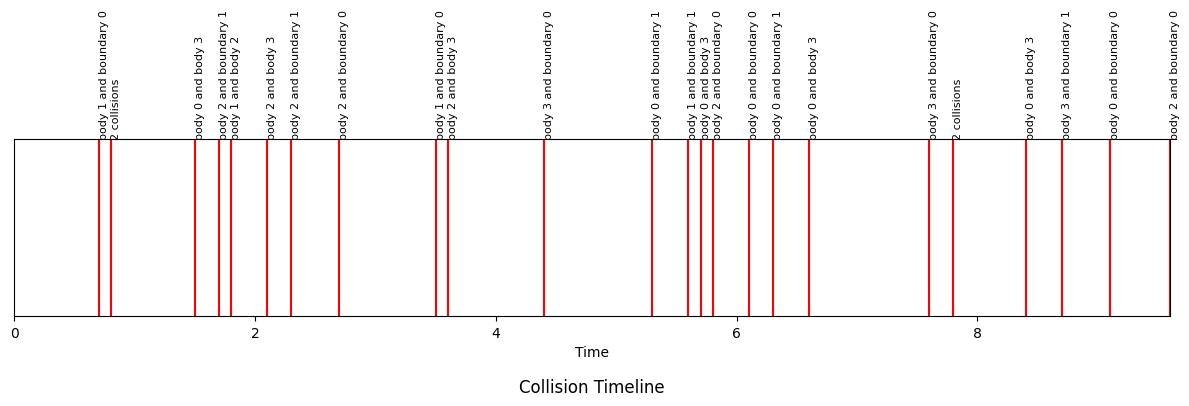

In [28]:
import matplotlib.pyplot as plt

# Get the total time span
total_time = max(collision['time'] for collisions in collision_history_by_timestep.values() for collision in collisions)

# Create a new figure
plt.figure(figsize=(12, 5))

# Loop through collision history by timestep
for timestep, collisions in collision_history_by_timestep.items():
    
    if len(collisions) == 1:
        collision = collisions[0]
        
        # Draw a vertical line at the time of the collision
        plt.vlines(collision['time'], 0, 1, colors='r')

        # Annotate the collision with smaller font size
        if "boundary" in collision:
            plt.text(collision['time'], 1, f"body {collision['body1']} and boundary {collision['boundary']}", rotation=90, verticalalignment='bottom', fontsize=8)
        else:
            plt.text(collision['time'], 1, f"body {collision['body1']} and body {collision['body2']}", rotation=90, verticalalignment='bottom', fontsize=8)
    elif len(collisions) > 1:
        collision = collisions[0]

        plt.vlines(collision['time'], 0, 1, colors='r')
        plt.text(collision['time'], 1, f"{len(collisions)} collisions", rotation=90, verticalalignment='bottom', fontsize=8)


# Set the limits and labels
plt.xlim(0, total_time)
plt.ylim(0, 1)
plt.xlabel('Time')
plt.yticks([])
ax = plt.gca()  # get current axes
ax.text(0.5, -0.4, 'Collision Timeline', ha='center', va='center', transform=ax.transAxes, fontsize=12)


# Show the plot
plt.tight_layout()
plt.savefig('collision_timeline.png')
plt.show()

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_timestep(ax, positions, velocities, space_size, max_radius):
    # Normalize the velocity vectors
    normalized_velocities = velocities / np.linalg.norm(velocities, axis=1, keepdims=True) * space_size

    # Set the limits of the plot
    ax.set_xlim([0, space_size])
    ax.set_ylim([0, space_size])

    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')

    # Add a grid
    ax.grid(True)

    # Convert positions list to numpy array
    positions = np.array(positions)

    # Plot the positions of the bodies
    ax.scatter(positions[:, 0], positions[:, 1], color='b')

    # Add transparent circles at the location of each body
    for pos in positions:
        circle = patches.Circle((pos[0], pos[1]), radius=max_radius, alpha=0.5, edgecolor='none')
        ax.add_patch(circle)

    # Plot the normalized velocities as vectors and display the original velocity values
    for pos, vel, orig_vel in zip(positions, normalized_velocities, velocities):
        ax.quiver(pos[0], pos[1], vel[0], vel[1], color='r')
        ax.text(pos[0] + orig_vel[0]/2, pos[1] + orig_vel[1]/2, f'({orig_vel[0]:.2f}, {orig_vel[1]:.2f})', color='r', fontsize=40)

# Number of timesteps to plot
num_timesteps = 40

# Create a new figure with a grid of subplots
fig, axs = plt.subplots(8, 5, figsize=(80, 120))  # 5 rows, 8 columns

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop over the timesteps
for i in range(num_timesteps):
    # Get the positions and velocities for this timestep
    positions = position_history_by_timestep[i]
    velocities = velocity_history_by_timestep[i]

    # Plot this timestep
    plot_timestep(axs[i], positions, velocities, space_size, max_radius)
    axs[i].set_title(f'Timestep {i}', fontsize=46)


# Adjust the space between subplots to be minimal
#plt.subplots_adjust(wspace=0.01, hspace=0.1)
# Display the plot
plt.tight_layout()
plt.show()
    #

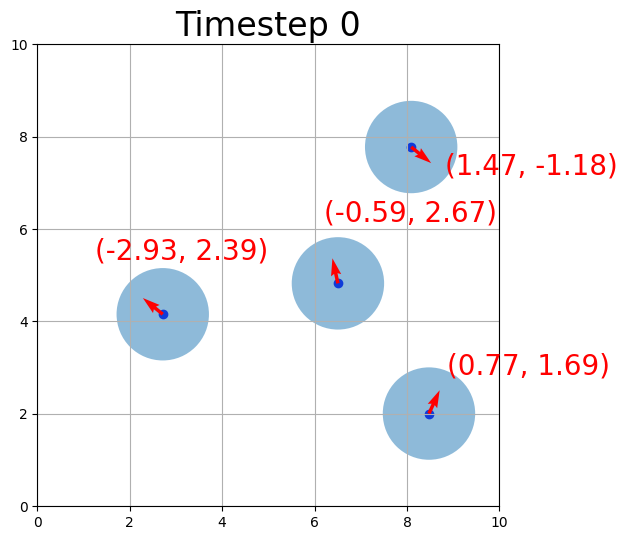

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import numpy as np

def plot_timestep(i):
    ax.clear()
    positions = position_history_by_timestep[i]
    velocities = velocity_history_by_timestep[i]
    normalized_velocities = velocities / np.linalg.norm(velocities, axis=1, keepdims=True) * space_size

    ax.set_xlim([0, space_size])
    ax.set_ylim([0, space_size])
    ax.set_aspect('equal')
    ax.grid(True)

    positions = np.array(positions)
    ax.scatter(positions[:, 0], positions[:, 1], color='b')

    for pos in positions:
        circle = patches.Circle((pos[0], pos[1]), radius=max_radius, alpha=0.5, edgecolor='none')
        ax.add_patch(circle)

    for pos, vel, orig_vel in zip(positions, normalized_velocities, velocities):
        ax.quiver(pos[0], pos[1], vel[0], vel[1], color='r')
        ax.text(pos[0] + orig_vel[0]/2, pos[1] + orig_vel[1]/2, f'({orig_vel[0]:.2f}, {orig_vel[1]:.2f})', color='r', fontsize=20)

    ax.set_title(f'Timestep {i}', fontsize=24)

num_timesteps = 100
fig, ax = plt.subplots(figsize=(10, 6))

ani = animation.FuncAnimation(fig, plot_timestep, frames=num_timesteps, interval=200)
# Save the animation as a GIF
ani.save('animation.gif', writer=PillowWriter(fps=10))

In [31]:

position_history = simulation.get_position_history()
position_history_by_timestep_list = list(map(list, zip(*position_history)))
#position_history_by_timestep_list = list(map(list, zip(*position_history)))
print(position_history_by_timestep_list)
print(len(position_history_by_timestep_list))


[[tensor([8.4769, 2.0067]), tensor([2.7144, 4.1561]), tensor([6.5060, 4.8249]), tensor([8.0916, 7.7761])], [tensor([8.5542, 2.1753]), tensor([2.4211, 4.3952]), tensor([6.4474, 5.0914]), tensor([8.2384, 7.6581])], [tensor([8.6315, 2.3439]), tensor([2.1278, 4.6344]), tensor([6.3888, 5.3579]), tensor([8.3853, 7.5401])], [tensor([8.7088, 2.5126]), tensor([1.8345, 4.8735]), tensor([6.3303, 5.6245]), tensor([8.5321, 7.4220])], [tensor([8.7860, 2.6812]), tensor([1.5412, 5.1126]), tensor([6.2717, 5.8910]), tensor([8.6789, 7.3040])], [tensor([8.8633, 2.8498]), tensor([1.2478, 5.3518]), tensor([6.2131, 6.1575]), tensor([8.8257, 7.1860])], [tensor([8.9406, 3.0185]), tensor([0.9545, 5.5909]), tensor([6.1545, 6.4241]), tensor([8.9725, 7.0679])], [tensor([9.0179, 3.1871]), tensor([1.2478, 5.8301]), tensor([6.0960, 6.6906]), tensor([9.1194, 6.9499])], [tensor([8.9406, 3.3557]), tensor([1.5412, 6.0692]), tensor([6.0374, 6.9571]), tensor([8.9725, 6.8319])], [tensor([8.8633, 3.5244]), tensor([1.8345, 6.

In [32]:

t_tensor_list = [torch.stack(t_l).flatten() for t_l in position_history_by_timestep_list]
result = torch.stack(t_tensor_list, dim=0)
print(result.shape)
print(result)

torch.Size([100, 8])
tensor([[8.4769, 2.0067, 2.7144, 4.1561, 6.5060, 4.8249, 8.0916, 7.7761],
        [8.5542, 2.1753, 2.4211, 4.3952, 6.4474, 5.0914, 8.2384, 7.6581],
        [8.6315, 2.3439, 2.1278, 4.6344, 6.3888, 5.3579, 8.3853, 7.5401],
        [8.7088, 2.5126, 1.8345, 4.8735, 6.3303, 5.6245, 8.5321, 7.4220],
        [8.7860, 2.6812, 1.5412, 5.1126, 6.2717, 5.8910, 8.6789, 7.3040],
        [8.8633, 2.8498, 1.2478, 5.3518, 6.2131, 6.1575, 8.8257, 7.1860],
        [8.9406, 3.0185, 0.9545, 5.5909, 6.1545, 6.4241, 8.9725, 7.0679],
        [9.0179, 3.1871, 1.2478, 5.8301, 6.0960, 6.6906, 9.1194, 6.9499],
        [8.9406, 3.3557, 1.5412, 6.0692, 6.0374, 6.9571, 8.9725, 6.8319],
        [8.8633, 3.5244, 1.8345, 6.3084, 5.9788, 7.2236, 8.8257, 6.7138],
        [8.7860, 3.6930, 2.1278, 6.5475, 5.9202, 7.4902, 8.6789, 6.5958],
        [8.7088, 3.8617, 2.4211, 6.7867, 5.8616, 7.7567, 8.5321, 6.4778],
        [8.6315, 4.0303, 2.7144, 7.0258, 5.8031, 8.0232, 8.3853, 6.3597],
        [8.5542, 

In [33]:
import torch
import torch

HIDDENVARIABLES = HiddenVariables(num_bodies=None, 
                                  masses=None,
                                  radii=None,
                                  acceleration_coefficients=None, 
                                  initial_velocities=initial_velocities,)


labels = ["num_bodies", "masses", "radii", "acceleration_coefficients", "initial_v"]

def prior_fn_basic(n_samples: int = 1) -> torch.Tensor:
    constant_mass_value = 1.0
    constant_radius_value = max_radius
    acceleration_coefficient_value = 0.0
    velocity_distribution = torch.distributions.Uniform(low=-4, high=4)

    num_bodies = torch.tensor(2)
    masses = torch.full((num_bodies,), constant_mass_value)
    radii = torch.full((num_bodies,), constant_radius_value)
    a_coeffs = torch.full((num_bodies,), acceleration_coefficient_value)
    initial_v = velocity_distribution.sample(sample_shape=torch.Size([num_bodies, 2]))


    flattened_tensors = torch.cat([torch.flatten(num_bodies),
                                   torch.flatten(masses),
                                   torch.flatten(radii),
                                   torch.flatten(a_coeffs),
                                   torch.flatten(initial_v)], dim=0)
    
    # concatenate flattened tensors n_samples times
    return torch.stack([flattened_tensors for _ in range(n_samples)], dim=0)


In [34]:

# prior and simulation interfaces
class Prior:
    def __init__(self, prior_fn, labels):
        self.prior_fn = prior_fn
        self.labels = labels
        self.mean = None
        self.std = None
        
    def sample(self, num_samples: int = 1) -> torch.Tensor:
        samples = self.prior_fn(num_samples)
        self.mean = torch.mean(samples)
        self.std = torch.std(samples)
        return samples
        
    def get_stats(self):
        if self.mean is None and self.std is None:
            raise ValueError("Sample first before getting stats")
        else:
            return self.mean, self.std
    
    def get_labels(self):
        return self.labels

In [35]:
basic_prior = Prior(prior_fn_basic, labels)
some_X = basic_prior.sample(1)
print(f"some_X: {some_X}")

some_X: tensor([[ 2.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.0000,  0.0000, -0.5571,
         -2.9052,  0.1381,  2.2387]])


In [36]:
import torch
import torch
# data set creation 
# X - input data - position histories by timestep 
# Y - ouput data - hidden varriables 


def simulate_collisions_simple(Y_i, vars, total_time, dt):

    position_distribution = torch.distributions.Uniform(low=0.0, high=space_size)
    HIDDENVARIABLES = HiddenVariables.from_tensor(Y_i)

    initial_positions = ElasticCollisionSimulation.sample_initial_positions_without_overlap(vars, position_distribution)
    vars.starting_positions = initial_positions

    simulation = ElasticCollisionSimulation(variables=vars, 
                                            enable_logging=False, 
                                            noise=False)

    _ = simulation.simulate(hidden_variables=HIDDENVARIABLES, \
                            total_time=total_time, \
                            dt=dt)
    
    position_history = simulation.get_position_history()    
    position_history_by_timestep_list = list(map(list, zip(*position_history)))
    t_tensor_list = [torch.stack(t_l).flatten() for t_l in position_history_by_timestep_list]
    return torch.stack(t_tensor_list, dim=0)

    
# Generate a simulated training dataset using the SIR model and prior distribution
def generate_training_data(num_samples, vars, total_time,dt, prior):

    Y = prior.sample(num_samples)

    X = []
    for i in range(num_samples):
        # access entries in Y torch tensor along the -1th dimension
        Y_i = Y[i]

        # -------- create X values using the simulation function 
        X_i = simulate_collisions_simple(Y_i, vars, total_time, dt)
        X.append(X_i.flatten())

    # X is a list of tensors, convert to a single tensor
    X = torch.stack(X, dim=0)
    return X, Y



In [37]:
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [38]:
""" X_train, Y_train = generate_training_data(5, VARIABLES, total_time, dt, basic_prior)
print(f"X_train shape: {X_train.shape}")
print(f"X_train: {X_train}") """

' X_train, Y_train = generate_training_data(5, VARIABLES, total_time, dt, basic_prior)\nprint(f"X_train shape: {X_train.shape}")\nprint(f"X_train: {X_train}") '

In [39]:
""" print(f"Y_train shape: {Y_train.shape}")
print(f"Y_train: {Y_train}") """

' print(f"Y_train shape: {Y_train.shape}")\nprint(f"Y_train: {Y_train}") '

#### Training simple feed-forward predictor model

In [40]:
from torch import nn

# Define the neural network architecture
# simple feed forward fully connected neural network with num_l_layers
class ParameterPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_l_layers: int = 1):
        super(ParameterPredictor, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1_s = self._build_fc_linear_layers(input_size, hidden_size, num_l_layers)
        self.relu = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden_size, 11)  # Output layer with 11 neurons for the output values

    def _build_fc_linear_layers(self, input_size, hidden_size, num_layers):
        layers = []
        if num_layers == 0:
            raise ValueError("num_layers must be greater than 0")
        elif num_layers == 1:
            return [nn.Linear(input_size, hidden_size)]
        elif num_layers > 1:
            return [nn.Linear(input_size, hidden_size)] + [nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)]
        return layers

    def forward(self, x):
        #print(f"1: x shape: {x.shape}")
        x = self.flatten(x)
        #print(f"2: x shape: {x.shape}")
        for layer in self.fc1_s:
            temp_x = layer(x)
            #print(f"3: x shape: {x.shape}")
            x = self.relu(temp_x)
        #x = self.relu(x)
        x = self.fc2(x)
        return x
    

class SummaryNetwork(ParameterPredictor):
    def __init__(self, input_size, hidden_size, num_l_layers: int = 1):
        super().__init__(input_size, hidden_size, num_l_layers)
        # Remove the fc2 layer
        del self.fc2

    def forward(self, x):
        x = self.flatten(x)
        for layer in self.fc1_s:
            x = self.relu(layer(x))
        return x

In [41]:
total_time = 10.0 
NUM_bodies = 2
dt = 0.1
space_size = 10.0
max_radius = space_size // 10.0
acceleration_coefficient_value = 0.0
constant_mass_value = 1.0
constant_radius_value = max_radius


VARIABLES = Variables(
        masses = torch.full((NUM_bodies,), constant_mass_value),
        radii = torch.full((NUM_bodies,), constant_radius_value),
        starting_positions = None,
        initial_velocities= None,
        acceleration_coefficients = torch.full((NUM_bodies,), acceleration_coefficient_value),
        num_bodies = NUM_bodies,
        space_size = torch.tensor([space_size, space_size]),
    )

In [42]:
# Define the number of training and test samples
num_train_samples = 80  # Adjust as needed
num_test_samples = 20   # Adjust as needed


# Generate training data
prior = Prior(prior_fn_basic, labels)
X_train, Y_train = generate_training_data(num_train_samples, VARIABLES, total_time,dt, prior)
# Generate test data
X_test, Y_test = generate_training_data(num_test_samples, VARIABLES, total_time, dt, prior)


print("Y_train shape:", Y_train.shape)
print("X_train shape:", X_train.shape)


print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Y_train shape: torch.Size([80, 11])
X_train shape: torch.Size([80, 400])
X_test shape: torch.Size([20, 400])
Y_test shape: torch.Size([20, 11])


In [43]:
def train_model(model, optimizer, criterion, num_samples, num_epochs, batch_size):
    
    for epoch in range(num_epochs):
        for i in range(0, num_samples, batch_size):
            inputs = X_train[i:i+batch_size]
            labels = Y_train[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

In [44]:
from torch import optim

# Training loop
num_samples = 80
num_epochs = 100
batch_size = 20
num_timesteps = 100
input_size = num_timesteps * NUM_bodies * 2
hidden_size = 64


# Define the loss function and optimizer

model = ParameterPredictor(input_size, hidden_size, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, optimizer, criterion, num_samples, num_epochs, batch_size)


with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, Y_test)

print(f"Test loss: {test_loss.item()}")

Epoch [1/100], Loss: 3.0502421855926514
Epoch [2/100], Loss: 2.495295763015747
Epoch [3/100], Loss: 2.0711851119995117
Epoch [4/100], Loss: 1.7588634490966797
Epoch [5/100], Loss: 1.5421721935272217
Epoch [6/100], Loss: 1.3969920873641968
Epoch [7/100], Loss: 1.2979117631912231
Epoch [8/100], Loss: 1.2279384136199951
Epoch [9/100], Loss: 1.177868127822876
Epoch [10/100], Loss: 1.1421312093734741
Epoch [11/100], Loss: 1.1170047521591187
Epoch [12/100], Loss: 1.0994230508804321
Epoch [13/100], Loss: 1.0863101482391357
Epoch [14/100], Loss: 1.0751335620880127
Epoch [15/100], Loss: 1.0644447803497314
Epoch [16/100], Loss: 1.053736686706543
Epoch [17/100], Loss: 1.0430190563201904
Epoch [18/100], Loss: 1.0324596166610718
Epoch [19/100], Loss: 1.0221668481826782
Epoch [20/100], Loss: 1.0121397972106934
Epoch [21/100], Loss: 1.0023518800735474
Epoch [22/100], Loss: 0.9928037524223328
Epoch [23/100], Loss: 0.9835102558135986
Epoch [24/100], Loss: 0.974493682384491
Epoch [25/100], Loss: 0.96576

In [45]:
"""
# Lists to store results
hidden_sizes = [32, 64,128]  # Vary hidden layer size
train_set_sizes = [500, 1000, 2000]  # Vary training set size
accuracies = []

# Training loop
for hidden_size in hidden_sizes:
    for train_set_size in train_set_sizes:
        model = ParameterPredictor(input_size, hidden_size)
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        X_train, Y_train = generate_training_data(train_set_size, T, prior_distribution)

        num_epochs = 50
        batch_size = 32
        losses = []

        for epoch in range(num_epochs):
            for i in range(0, train_set_size, batch_size):
                inputs = X_train[i:i+batch_size]
                labels = Y_train[i:i+batch_size]

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            losses.append(loss.item())

        # Evaluate the model on a simulated test set (similar to training data generation)
        X_test, Y_test = generate_training_data(num_samples, T, prior_distribution)
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, Y_test)

        
        accuracies.append(test_loss.item())

# Create a heatmap of accuracies
accuracies = np.array(accuracies).reshape(len(hidden_sizes), len(train_set_sizes))
plt.figure(figsize=(10, 6))
plt.imshow(accuracies, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Test Loss')
plt.xticks(np.arange(len(train_set_sizes)), train_set_sizes)
plt.yticks(np.arange(len(hidden_sizes)), hidden_sizes)
plt.xlabel('Training Set Size')
plt.ylabel('Hidden Layer Size')
plt.title('Accuracy Heatmap')
plt.show()
"""

"\n# Lists to store results\nhidden_sizes = [32, 64,128]  # Vary hidden layer size\ntrain_set_sizes = [500, 1000, 2000]  # Vary training set size\naccuracies = []\n\n# Training loop\nfor hidden_size in hidden_sizes:\n    for train_set_size in train_set_sizes:\n        model = ParameterPredictor(input_size, hidden_size)\n        optimizer = optim.Adam(model.parameters(), lr=0.001)\n\n        X_train, Y_train = generate_training_data(train_set_size, T, prior_distribution)\n\n        num_epochs = 50\n        batch_size = 32\n        losses = []\n\n        for epoch in range(num_epochs):\n            for i in range(0, train_set_size, batch_size):\n                inputs = X_train[i:i+batch_size]\n                labels = Y_train[i:i+batch_size]\n\n                optimizer.zero_grad()\n                outputs = model(inputs)\n                loss = criterion(outputs, labels)\n                loss.backward()\n                optimizer.step()\n\n            losses.append(loss.item())\n\n    

### Conditional Real NVP

In [46]:
import torch.nn.functional as F
import numpy as np
import math

def subnet_constructor(input_size, hidden_size, output_size):
    model = nn.Sequential(
                        nn.Linear(input_size, hidden_size),
                        nn.ReLU(),
                        nn.Linear(hidden_size, hidden_size),
                        nn.ReLU(),
                        nn.Linear(hidden_size, output_size)
                        )
    return model

class CouplingBlock(nn.Module):
    def __init__(self, input_size, hidden_size, condition_size):
        super(CouplingBlock, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.condition_size = condition_size
        self.split1 = math.floor(self.input_size/2)
        self.split2 = self.input_size - self.split1
        self.subnet = subnet_constructor(self.split1 + self.condition_size, self.hidden_size, 2*self.split2)
        

    def forward(self, x, cond):
        x1, x2 = x[..., :self.split1], x[..., self.split1:]
        params = self.subnet(torch.cat([x1, cond], -1))
        s, t = params[...,:self.split2], params[...,self.split2:]
        s = torch.tanh(s)
        ljd = torch.sum(s, -1)

        s = torch.exp(s)
        x2 = s*x2 + t
        return torch.cat([x1,x2], -1), ljd
        

    def inverse(self, y, cond):
        x1, x2 = y[..., :self.split1], y[..., self.split1:]
        params = self.subnet(torch.cat([x1, cond], -1))
        s, t = params[...,:self.split2], params[...,self.split2:]
        s = torch.tanh(s)
        ljd = torch.sum(s, -1)

        s = torch.exp(-s)
        x2 = s * (x2-t)
        return torch.cat([x1,x2], -1)

class ConditionalRealNVP(nn.Module):
    def __init__(self, input_size, hidden_size, blocks, condition_size):
        super(ConditionalRealNVP, self).__init__()
        self.blocks = nn.ModuleList([CouplingBlock(input_size, hidden_size, condition_size) for _ in range(blocks)])
        self.orthogonal_matrices = [torch.from_numpy(np.linalg.qr(np.random.randn(input_size, input_size))[0]).float() for _ in range(blocks - 1)]

    def forward(self, x, condition):
        log_det_jacobian = 0
        for i, block in enumerate(self.blocks):
            x, log_det_j = block(x, condition)
            log_det_jacobian += log_det_j
            if i != len(self.blocks) - 1:
                x = torch.matmul(x, self.orthogonal_matrices[i]) # changed from torch.mm to torch.matmul
        return x, log_det_jacobian

    def inverse(self, y, condition):
        for i, block in reversed(list(enumerate(self.blocks))):
            if i != len(self.blocks) - 1:
                y = torch.matmul(y, self.orthogonal_matrices[i].inverse()) # changed from torch.mm to torch.matmul
            y = block.inverse(y, condition)
        return y

    def loss_function(self, z, log_det_jacobians):
        log_likelihood = -0.5 * torch.sum(z**2, dim=-1) - 0.5 * np.log(2 * np.pi) * z.size(1) # changed from dim=1 to dim=-1
        return -(log_likelihood + log_det_jacobians).mean()

In [47]:
import torch
import torch.nn as nn
from tqdm import tqdm

def train_INN(data_loader, inference_network, summary_network, optimizer, train_config):
    noise = train_config.get('added_noise', 0.0)
    loss_history = {'train': [], 'validation': []}
    epochs = train_config['epochs']

    for epoch in range(epochs):
        inference_network.train()
        summary_network.train()
        total_loss = 0.0
        
        for sim_data, params_data in tqdm(data_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            sim_data = sim_data.to(train_config["device"])
            params_data = params_data.to(train_config["device"])

            # Add noise to the parameters data
            p_noise = params_data + torch.randn_like(params_data) * noise

            # Forward pass
            summary_stats = summary_network(sim_data)
            z, log_det_jacobians = inference_network(p_noise, summary_stats)
            
            # Calculate loss
            loss = inference_network.loss_function(z, log_det_jacobians)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # Calculate average loss for the epoch
        average_loss = total_loss / len(data_loader)
        loss_history['train'].append(average_loss)

        # Validation loss
        with torch.no_grad():
            inference_network.eval()
            summary_network.eval()
            total_val_loss = 0.0
            for sim_data, params_data in data_loader:
                sim_data = sim_data.to(train_config["device"])
                params_data = params_data.to(train_config["device"])
                vp_noise = params_data + torch.randn_like(params_data) * noise
                v_summary_stats = summary_network(sim_data)
                v_z, v_log_det_jacobians = inference_network(vp_noise, v_summary_stats)
                v_loss = inference_network.loss_function(v_z, v_log_det_jacobians)
                total_val_loss += v_loss.item()
            average_val_loss = total_val_loss / len(data_loader)
            loss_history['validation'].append(average_val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {average_loss}, Validation Loss: {average_val_loss}")

    return loss_history

In [48]:
dataset = MyDataset(X_train, Y_train)
batch_size = 10  # Define your desired batch size
shuffle = True  # Set to True if you want to shuffle the data
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

In [ ]:
"""
# Training loop
num_samples = 80
num_epochs = 100
batch_size = 20
num_timesteps = 100
input_size = num_timesteps * NUM_bodies * 2
hidden_size = 64
"""

In [ ]:
model2 = SummaryNetwork(input_size, hidden_size, 1)

# Copy the weights
model2.flatten.load_state_dict(model.flatten.state_dict())
for layer2, layer1 in zip(model2.fc1_s, model.fc1_s):
    layer2.load_state_dict(layer1.state_dict())

In [49]:
# Assuming you have already imported the necessary libraries and defined your models

# Step 2: Define Model
input_size = num_timesteps * NUM_bodies * 2
hidden_size = 64
num_coupling_layers = 2
condition_size = 11
inference_network = ConditionalRealNVP(input_size, hidden_size, num_coupling_layers, condition_size)
summary_network = model2

# Step 3: Define Optimizer
optimizer = torch.optim.Adam(list(inference_network.parameters()) + list(summary_network.parameters()), lr=0.001)

# Step 4: Set Training Configurations
train_config = {
    'epochs': 10,
    'added_noise': 0.0,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
    # Add more configurations as needed
}

# Step 5: Call train_INN Function
loss_history = train_INN(data_loader, inference_network, summary_network, optimizer, train_config)


Epoch 1/10:   0%|          | 0/8 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x75 and 211x64)